# This is the beginning of the DataHacks ScienceGang Project

---

## Part1: General Setup and Imports

In [1]:
# general imports
import os
import numpy as np
import pandas as pd
import seaborn as sns
import folium
from folium import plugins

# These lines set up graphing capabilities.
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
pd.set_option('display.max_rows', 15)

%matplotlib inline

In [2]:
# read .csv file into a DataFrame
loc = 'U.S._Chronic_Disease_Indicators__CDI_.csv'
Chronic_Diseases = pd.read_csv(loc)
Chronic_Diseases

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2015,2015,US,United States,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,NaN,$,US Dollars,...,59,ALC,ALC8_0_2,USD,OVERALL,OVR,NaN,NaN,NaN,NaN
1,2012,2012,DC,District of Columbia,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,NaN,$,US Dollars,...,11,ALC,ALC8_0_1,USD,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2012,2012,GU,Guam,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,NaN,$,US Dollars,...,66,ALC,ALC8_0_1,USD,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2012,2012,PR,Puerto Rico,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,NaN,$,US Dollars,...,72,ALC,ALC8_0_1,USD,OVERALL,OVR,NaN,NaN,NaN,NaN
4,2012,2012,US,United States,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,NaN,$,US Dollars,...,59,ALC,ALC8_0_1,USD,OVERALL,OVR,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519713,2014,2014,DE,Delaware,BRFSS,Arthritis,Physical inactivity among adults aged >= 18 ye...,NaN,%,Age-adjusted Prevalence,...,10,ART,ART3_0,AGEADJPREV,RACE,OTH,NaN,NaN,NaN,NaN
519714,2015,2015,OR,Oregon,BRFSS,"Nutrition, Physical Activity, and Weight Status",Meeting aerobic physical activity guidelines f...,NaN,%,Crude Prevalence,...,41,NPAW,NPAW11_3,CRDPREV,GENDER,GENF,NaN,NaN,NaN,NaN
519715,2014,2014,AR,Arkansas,State Inpatient Data,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,NaN,"cases per 10,000",Crude Rate,...,5,COPD,COPD5_1,CRDRATE,GENDER,GENF,NaN,NaN,NaN,NaN
519716,2016,2016,CT,Connecticut,BRFSS,Cardiovascular Disease,Influenza vaccination among noninstitutionaliz...,NaN,%,Age-adjusted Prevalence,...,9,CVD,CVD9_2,AGEADJPREV,RACE,HIS,NaN,NaN,NaN,NaN


In [3]:
# browse data structure and contents
print(Chronic_Diseases.shape)
print(Chronic_Diseases.describe())

(519718, 34)
           YearStart        YearEnd  DataValueAlt  LowConfidenceLimit  \
count  519718.000000  519718.000000  3.503350e+05       311062.000000   
mean     2013.141885    2013.162754  8.917742e+02           46.759401   
std         1.777622       1.762672  1.833073e+04           77.492628   
min      2001.000000    2001.000000  0.000000e+00            0.200000   
25%      2012.000000    2012.000000  1.845500e+01           12.700000   
50%      2013.000000    2013.000000  4.100000e+01           30.200000   
75%      2015.000000    2015.000000  7.030000e+01           55.400000   
max      2016.000000    2016.000000  2.600878e+06         1330.660000   

       HighConfidenceLimit     LocationID  
count        311062.000000  519718.000000  
mean             58.991287      30.993144  
std              88.668862      17.723341  
min               0.420000       1.000000  
25%              18.900000      17.000000  
50%              43.800000      30.000000  
75%              70.4

In [4]:
Chronic_Diseases.isna().sum()

YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
DataSource                        0
                              ...  
StratificationID1                 0
StratificationCategoryID2    440529
StratificationID2            440529
StratificationCategoryID3    440530
StratificationID3            440530
Length: 34, dtype: int64

---

## Explore Empty Columns

In [5]:
responses = Chronic_Diseases['Response'].value_counts()
print(Chronic_Diseases.get("Response").isna().sum())
responses

440530


     79188
Name: Response, dtype: int64

In [6]:
responses = Chronic_Diseases['StratificationCategoryID2'].value_counts()
print(Chronic_Diseases.get("StratificationCategoryID2").isna().sum())
responses

440529


     79189
Name: StratificationCategoryID2, dtype: int64

In [7]:
responses = Chronic_Diseases['StratificationID2'].value_counts()
print(Chronic_Diseases.get("StratificationID2").isna().sum())
responses

440529


     79189
Name: StratificationID2, dtype: int64

In [8]:
responses = Chronic_Diseases['StratificationCategoryID3'].value_counts()
print(Chronic_Diseases.get("StratificationCategoryID3").isna().sum())
responses

440530


     79188
Name: StratificationCategoryID3, dtype: int64

In [9]:
responses = Chronic_Diseases['StratificationID3'].value_counts()
print(Chronic_Diseases.get("StratificationID3").isna().sum())
responses

440530


     79188
Name: StratificationID3, dtype: int64

In [10]:
responses = Chronic_Diseases['StratificationCategory3'].value_counts()
print(Chronic_Diseases.get("StratificationCategory3").isna().sum())
responses

440530


     79188
Name: StratificationCategory3, dtype: int64

In [11]:
responses = Chronic_Diseases['Stratification3'].value_counts()
print(Chronic_Diseases.get("Stratification3").isna().sum())
responses

440530


     79188
Name: Stratification3, dtype: int64

In [12]:
responses = Chronic_Diseases['StratificationCategory2'].value_counts()
print(Chronic_Diseases.get("StratificationCategory2").isna().sum())
responses

440530


     79188
Name: StratificationCategory2, dtype: int64

In [13]:
responses = Chronic_Diseases['Stratification2'].value_counts()
print(Chronic_Diseases.get("Stratification2").isna().sum())
responses

440530


     79188
Name: Stratification2, dtype: int64

In [14]:
responses = Chronic_Diseases['ResponseID'].value_counts()
print(Chronic_Diseases.get("ResponseID").isna().sum())
responses

440542


     79176
Name: ResponseID, dtype: int64

### All the above columns contain either `NULL` or `BLANK` values. Since they don't tell us anything about the population health, we will drop them

---

In [15]:
responses = Chronic_Diseases['DataValueFootnoteSymbol'].value_counts()
print(Chronic_Diseases.get('DataValueFootnoteSymbol').isna().sum())
responses

292400


****     98370
         56098
-        39252
~        30532
*         2062
         ...  
*, #         6
§,‡          1
§§           1
§,‡,^        1
^^^          1
Name: DataValueFootnoteSymbol, Length: 19, dtype: int64

In [16]:
Chronic_Diseases = Chronic_Diseases.drop(columns = ['Response', 'StratificationCategoryID2', 'StratificationID2',
                        'StratificationCategoryID3', 'StratificationID3', 'StratificationCategory3',
                       'Stratification3', 'StratificationCategory2', 'Stratification2',
                       'ResponseID', 'DataValueFootnoteSymbol'])
Chronic_Diseases

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
0,2015,2015,US,United States,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,NaN,...,NaN,Overall,Overall,NaN,59,ALC,ALC8_0_2,USD,OVERALL,OVR
1,2012,2012,DC,District of Columbia,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,0.09,...,NaN,Overall,Overall,"(38.907192, -77.036871)",11,ALC,ALC8_0_1,USD,OVERALL,OVR
2,2012,2012,GU,Guam,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,NaN,...,NaN,Overall,Overall,"(13.444304, 144.793731)",66,ALC,ALC8_0_1,USD,OVERALL,OVR
3,2012,2012,PR,Puerto Rico,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,NaN,...,NaN,Overall,Overall,"(18.220833, -66.590149)",72,ALC,ALC8_0_1,USD,OVERALL,OVR
4,2012,2012,US,United States,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,NaN,...,NaN,Overall,Overall,NaN,59,ALC,ALC8_0_1,USD,OVERALL,OVR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519713,2014,2014,DE,Delaware,BRFSS,Arthritis,Physical inactivity among adults aged >= 18 ye...,%,Age-adjusted Prevalence,NaN,...,NaN,Race/Ethnicity,"Other, non-Hispanic","(39.008830667, -75.577741168)",10,ART,ART3_0,AGEADJPREV,RACE,OTH
519714,2015,2015,OR,Oregon,BRFSS,"Nutrition, Physical Activity, and Weight Status",Meeting aerobic physical activity guidelines f...,%,Crude Prevalence,39.5,...,42.00,Gender,Female,"(44.567449424, -120.155031326)",41,NPAW,NPAW11_3,CRDPREV,GENDER,GENF
519715,2014,2014,AR,Arkansas,State Inpatient Data,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,"cases per 10,000",Crude Rate,74.94,...,77.05,Gender,Female,"(34.748650124, -92.274490743)",5,COPD,COPD5_1,CRDRATE,GENDER,GENF
519716,2016,2016,CT,Connecticut,BRFSS,Cardiovascular Disease,Influenza vaccination among noninstitutionaliz...,%,Age-adjusted Prevalence,NaN,...,NaN,Race/Ethnicity,Hispanic,"(41.56266102, -72.649840952)",9,CVD,CVD9_2,AGEADJPREV,RACE,HIS


---

## Explore DataSources

In [17]:
Chronic_Diseases.get("DataSource").isna().sum()

0

### The dataset contains information from *32* different sources

In [18]:
# This dataset consists of 32 various sources
Chronic_Diseases.get("DataSource").value_counts().shape

(32,)

---

## Next, let's see if there are redundant columns

In [19]:
Chronic_Diseases.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'DataValueUnit', 'DataValueType', 'DataValue',
       'DataValueAlt', 'DatavalueFootnote', 'LowConfidenceLimit',
       'HighConfidenceLimit', 'StratificationCategory1', 'Stratification1',
       'GeoLocation', 'LocationID', 'TopicID', 'QuestionID', 'DataValueTypeID',
       'StratificationCategoryID1', 'StratificationID1'],
      dtype='object')

In [20]:
stratification_category = pd.DataFrame().assign(c1=Chronic_Diseases.get("StratificationCategory1"), c2=Chronic_Diseases.get("StratificationCategoryID1"))
stratification_category

,c1,c2
0,Overall,OVERALL
1,Overall,OVERALL
2,Overall,OVERALL
3,Overall,OVERALL
4,Overall,OVERALL
...,...,...
519713,Race/Ethnicity,RACE
519714,Gender,GENDER
519715,Gender,GENDER
519716,Race/Ethnicity,RACE


In [21]:
stratification_ID = pd.DataFrame().assign(c1=Chronic_Diseases.get("Stratification1"), c2=Chronic_Diseases.get("StratificationID1"))
stratification_ID

,c1,c2
0,Overall,OVR
1,Overall,OVR
2,Overall,OVR
3,Overall,OVR
4,Overall,OVR
...,...,...
519713,"Other, non-Hispanic",OTH
519714,Female,GENF
519715,Female,GENF
519716,Hispanic,HIS


### It's obvious that these two columns essentially contain the same information in different formats. We will only keep one and drop the other

In [22]:
Chronic_Diseases.drop(columns=['StratificationCategoryID1','StratificationID1'], inplace=True)

In [23]:
Chronic_Diseases.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'DataValueUnit', 'DataValueType', 'DataValue',
       'DataValueAlt', 'DatavalueFootnote', 'LowConfidenceLimit',
       'HighConfidenceLimit', 'StratificationCategory1', 'Stratification1',
       'GeoLocation', 'LocationID', 'TopicID', 'QuestionID',
       'DataValueTypeID'],
      dtype='object')

In [24]:
Chronic_Diseases

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID
0,2015,2015,US,United States,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,NaN,...,No data available,NaN,NaN,Overall,Overall,NaN,59,ALC,ALC8_0_2,USD
1,2012,2012,DC,District of Columbia,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,0.09,...,NaN,NaN,NaN,Overall,Overall,"(38.907192, -77.036871)",11,ALC,ALC8_0_1,USD
2,2012,2012,GU,Guam,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,NaN,...,No data available,NaN,NaN,Overall,Overall,"(13.444304, 144.793731)",66,ALC,ALC8_0_1,USD
3,2012,2012,PR,Puerto Rico,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,NaN,...,No data available,NaN,NaN,Overall,Overall,"(18.220833, -66.590149)",72,ALC,ALC8_0_1,USD
4,2012,2012,US,United States,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,NaN,...,No data available,NaN,NaN,Overall,Overall,NaN,59,ALC,ALC8_0_1,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519713,2014,2014,DE,Delaware,BRFSS,Arthritis,Physical inactivity among adults aged >= 18 ye...,%,Age-adjusted Prevalence,NaN,...,Sample size of denominator and/or age group fo...,NaN,NaN,Race/Ethnicity,"Other, non-Hispanic","(39.008830667, -75.577741168)",10,ART,ART3_0,AGEADJPREV
519714,2015,2015,OR,Oregon,BRFSS,"Nutrition, Physical Activity, and Weight Status",Meeting aerobic physical activity guidelines f...,%,Crude Prevalence,39.5,...,NaN,37.00,42.00,Gender,Female,"(44.567449424, -120.155031326)",41,NPAW,NPAW11_3,CRDPREV
519715,2014,2014,AR,Arkansas,State Inpatient Data,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,"cases per 10,000",Crude Rate,74.94,...,NaN,72.83,77.05,Gender,Female,"(34.748650124, -92.274490743)",5,COPD,COPD5_1,CRDRATE
519716,2016,2016,CT,Connecticut,BRFSS,Cardiovascular Disease,Influenza vaccination among noninstitutionaliz...,%,Age-adjusted Prevalence,NaN,...,Sample size of denominator and/or age group fo...,NaN,NaN,Race/Ethnicity,Hispanic,"(41.56266102, -72.649840952)",9,CVD,CVD9_2,AGEADJPREV


---

## Exploratory Data Analysis on Stratification 

In [25]:
Chronic_Diseases.get("StratificationCategory1").value_counts()

Race/Ethnicity    320170
Gender            121660
Overall            77888
Name: StratificationCategory1, dtype: int64

---

### Most Health Surveys exclusively focus on the race of participants, then the gender. The fewest surveys concern the overall background

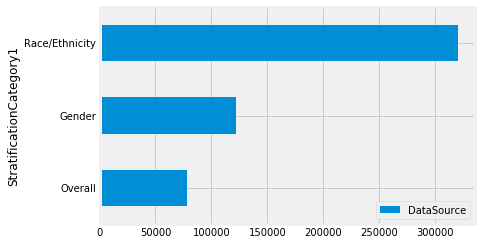

In [26]:
Chronic_Diseases.groupby("StratificationCategory1").count().sort_values("DataSource").plot(kind='barh', y='DataSource')

---

In [27]:
Chronic_Diseases.get("Stratification1").value_counts()

Overall                             77888
Black, non-Hispanic                 64034
Hispanic                            64034
White, non-Hispanic                 64034
Male                                60830
Female                              60830
Other, non-Hispanic                 46441
Multiracial, non-Hispanic           46441
American Indian or Alaska Native    17593
Asian or Pacific Islander           16851
Asian, non-Hispanic                   742
Name: Stratification1, dtype: int64

In [28]:
# Subset the dataset into different stratification categories
stratification_category_1 = Chronic_Diseases[Chronic_Diseases.get("StratificationCategory1") == 'Race/Ethnicity']
stratification_category_2 = Chronic_Diseases[Chronic_Diseases.get("StratificationCategory1") == 'Gender']
stratification_category_3 = Chronic_Diseases[Chronic_Diseases.get("StratificationCategory1") == 'Overall']

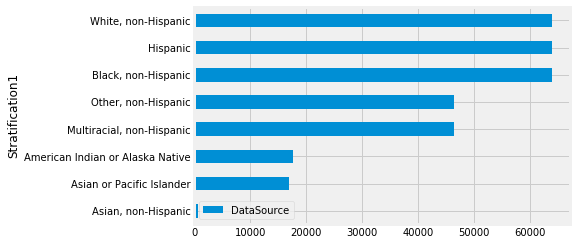

In [29]:
stratification_category_1.groupby("Stratification1").count().sort_values("DataSource").plot(kind='barh', y='DataSource')

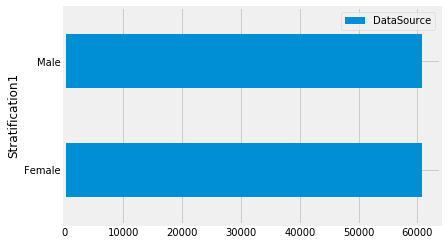

In [30]:
stratification_category_2.groupby("Stratification1").count().sort_values("DataSource").plot(kind='barh', y='DataSource')

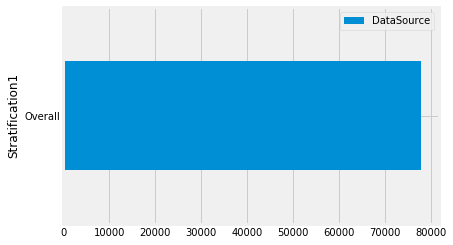

In [31]:
stratification_category_3.groupby("Stratification1").count().sort_values("DataSource").plot(kind='barh', y='DataSource')

### The surveys have participants of different ethnic groups, similar numbers of males and females

---

## EDA on Geolocations

In [32]:
Chronic_Diseases.get("GeoLocation").isna().sum()

3603

In [33]:
valid_geo = Chronic_Diseases[Chronic_Diseases.get("GeoLocation").notna()]
valid_geo

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID
1,2012,2012,DC,District of Columbia,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,0.09,...,NaN,NaN,NaN,Overall,Overall,"(38.907192, -77.036871)",11,ALC,ALC8_0_1,USD
2,2012,2012,GU,Guam,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,NaN,...,No data available,NaN,NaN,Overall,Overall,"(13.444304, 144.793731)",66,ALC,ALC8_0_1,USD
3,2012,2012,PR,Puerto Rico,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,NaN,...,No data available,NaN,NaN,Overall,Overall,"(18.220833, -66.590149)",72,ALC,ALC8_0_1,USD
5,2012,2012,VI,Virgin Islands,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,NaN,...,No data available,NaN,NaN,Overall,Overall,"(18.335765, -64.896335)",78,ALC,ALC8_0_1,USD
6,2012,2012,GU,Guam,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,$,US Dollars,NaN,...,No data available,NaN,NaN,Overall,Overall,"(13.444304, 144.793731)",66,ALC,ALC8_0_2,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519713,2014,2014,DE,Delaware,BRFSS,Arthritis,Physical inactivity among adults aged >= 18 ye...,%,Age-adjusted Prevalence,NaN,...,Sample size of denominator and/or age group fo...,NaN,NaN,Race/Ethnicity,"Other, non-Hispanic","(39.008830667, -75.577741168)",10,ART,ART3_0,AGEADJPREV
519714,2015,2015,OR,Oregon,BRFSS,"Nutrition, Physical Activity, and Weight Status",Meeting aerobic physical activity guidelines f...,%,Crude Prevalence,39.5,...,NaN,37.00,42.00,Gender,Female,"(44.567449424, -120.155031326)",41,NPAW,NPAW11_3,CRDPREV
519715,2014,2014,AR,Arkansas,State Inpatient Data,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,"cases per 10,000",Crude Rate,74.94,...,NaN,72.83,77.05,Gender,Female,"(34.748650124, -92.274490743)",5,COPD,COPD5_1,CRDRATE
519716,2016,2016,CT,Connecticut,BRFSS,Cardiovascular Disease,Influenza vaccination among noninstitutionaliz...,%,Age-adjusted Prevalence,NaN,...,Sample size of denominator and/or age group fo...,NaN,NaN,Race/Ethnicity,Hispanic,"(41.56266102, -72.649840952)",9,CVD,CVD9_2,AGEADJPREV


In [34]:
alc_data = Chronic_Diseases[Chronic_Diseases['Topic'] == 'Alcohol']
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
alc_data

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID
0,2015,2015,US,United States,APIS,Alcohol,Amount of alcohol excise tax by beverage type (wine),$,US Dollars,NaN,NaN,No data available,NaN,NaN,Overall,Overall,NaN,59,ALC,ALC8_0_2,USD
1,2012,2012,DC,District of Columbia,APIS,Alcohol,Amount of alcohol excise tax by beverage type (beer),$,US Dollars,0.09,0.09,NaN,NaN,NaN,Overall,Overall,"(38.907192, -77.036871)",11,ALC,ALC8_0_1,USD
2,2012,2012,GU,Guam,APIS,Alcohol,Amount of alcohol excise tax by beverage type (beer),$,US Dollars,NaN,NaN,No data available,NaN,NaN,Overall,Overall,"(13.444304, 144.793731)",66,ALC,ALC8_0_1,USD
3,2012,2012,PR,Puerto Rico,APIS,Alcohol,Amount of alcohol excise tax by beverage type (beer),$,US Dollars,NaN,NaN,No data available,NaN,NaN,Overall,Overall,"(18.220833, -66.590149)",72,ALC,ALC8_0_1,USD
4,2012,2012,US,United States,APIS,Alcohol,Amount of alcohol excise tax by beverage type (beer),$,US Dollars,NaN,NaN,No data available,NaN,NaN,Overall,Overall,NaN,59,ALC,ALC8_0_1,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519576,2014,2014,OK,Oklahoma,BRFSS,Alcohol,Binge drinking frequency among adults aged >= 18 years who binge drink,Number,Age-adjusted Mean,6.2,6.20,NaN,3.1,9.2,Race/Ethnicity,"Multiracial, non-Hispanic","(35.472031356, -97.521070214)",40,ALC,ALC3_0,AGEADJMEAN
519646,2013,2013,NE,Nebraska,BRFSS,Alcohol,Binge drinking intensity among adults aged >= 18 years who binge drink,Number,Age-adjusted Mean,NaN,NaN,Sample size of denominator and/or age group for age-standardization is less than 50 or relative standard error is more than 30%,NaN,NaN,Race/Ethnicity,"Black, non-Hispanic","(41.641040988001, -99.365720623)",31,ALC,ALC4_0,AGEADJMEAN
519660,2014,2014,LA,Louisiana,NVSS,Alcohol,Chronic liver disease mortality,"cases per 100,000",Age-adjusted Rate,9.8,9.80,,8.9,10.7,Overall,Overall,"(31.312660644, -92.445680071)",22,ALC,ALC6_0,AGEADJRATE
519671,2013,2013,WA,Washington,BRFSS,Alcohol,Heavy drinking among women aged 18-44 years,%,Crude Prevalence,NaN,NaN,Sample size of denominator and/or age group for age-standardization is less than 50 or relative standard error is more than 30%,NaN,NaN,Race/Ethnicity,"Multiracial, non-Hispanic","(47.522278629, -120.47001079)",53,ALC,ALC5_2,CRDPREV


In [35]:
pd.set_option('display.max_rows', None)
alc_data['Question'].value_counts()

Chronic liver disease mortality                                           6135
Binge drinking prevalence among adults aged >= 18 years                   5220
Binge drinking intensity among adults aged >= 18 years who binge drink    5220
Heavy drinking among adults aged >= 18 years                              5220
Binge drinking frequency among adults aged >= 18 years who binge drink    5220
Binge drinking prevalence among women aged 18-44 years                    1950
Heavy drinking among women aged 18-44 years                               1950
Amount of alcohol excise tax by beverage type (distilled spirits)         110 
Amount of alcohol excise tax by beverage type (beer)                      110 
Local authority to regulate alcohol outlet density                        110 
Amount of alcohol excise tax by beverage type (wine)                      110 
Binge drinking prevalence among youth                                     110 
Per capita alcohol consumption among persons aged >=

In [36]:
pd.set_option('display.max_rows', 10)
alc_mod_data = alc_data[alc_data['DatavalueFootnote'] != 'No data available']
alc_mod_data = alc_mod_data[alc_mod_data['DatavalueFootnote'] != 'State directly controlled the sale of (beer/wine/distilled spirits) at the retail and/or wholesale levels. State prices for (beer/wine/distilled spirits) combined both markups and taxes, so tax rates for this beverage type could not be determined.']
alc_mod_data = alc_mod_data[alc_mod_data['DatavalueFootnote'] != 'Sample size of denominator and/or age group for age-standardization is less than 50 or relative standard error is more than 30%']
alc_mod_data = alc_mod_data[alc_mod_data['DatavalueFootnote'] != 'Data not shown because of too few respondents or cases']
alc_mod_data

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID
1,2012,2012,DC,District of Columbia,APIS,Alcohol,Amount of alcohol excise tax by beverage type (beer),$,US Dollars,0.09,0.09,NaN,NaN,NaN,Overall,Overall,"(38.907192, -77.036871)",11,ALC,ALC8_0_1,USD
14,2015,2015,DC,District of Columbia,APIS,Alcohol,Amount of alcohol excise tax by beverage type (beer),$,US Dollars,0.09,0.09,NaN,NaN,NaN,Overall,Overall,"(38.907192, -77.036871)",11,ALC,ALC8_0_1,USD
17,2012,2012,OR,Oregon,APIS,Alcohol,Amount of alcohol excise tax by beverage type (beer),$,US Dollars,0.08,0.08,NaN,NaN,NaN,Overall,Overall,"(44.567449424, -120.155031326)",41,ALC,ALC8_0_1,USD
18,2012,2012,MT,Montana,APIS,Alcohol,Amount of alcohol excise tax by beverage type (beer),$,US Dollars,0.14,0.14,NaN,NaN,NaN,Overall,Overall,"(47.066528972, -109.424420645)",30,ALC,ALC8_0_1,USD
21,2015,2015,NE,Nebraska,APIS,Alcohol,Amount of alcohol excise tax by beverage type (wine),$,US Dollars,0.95,0.95,NaN,NaN,NaN,Overall,Overall,"(41.641040988001, -99.365720623)",31,ALC,ALC8_0_2,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519515,2015,2015,WA,Washington,BRFSS,Alcohol,Heavy drinking among adults aged >= 18 years,%,Age-adjusted Prevalence,3.9,3.90,NaN,2.5,5.9,Race/Ethnicity,"Other, non-Hispanic","(47.522278629, -120.47001079)",53,ALC,ALC5_1,AGEADJPREV
519537,2015,2015,SD,South Dakota,BRFSS,Alcohol,Binge drinking frequency among adults aged >= 18 years who binge drink,Number,Age-adjusted Mean,3.7,3.70,NaN,3.0,4.3,Race/Ethnicity,"Other, non-Hispanic","(44.353130053, -100.373530637)",46,ALC,ALC3_0,AGEADJMEAN
519576,2014,2014,OK,Oklahoma,BRFSS,Alcohol,Binge drinking frequency among adults aged >= 18 years who binge drink,Number,Age-adjusted Mean,6.2,6.20,NaN,3.1,9.2,Race/Ethnicity,"Multiracial, non-Hispanic","(35.472031356, -97.521070214)",40,ALC,ALC3_0,AGEADJMEAN
519660,2014,2014,LA,Louisiana,NVSS,Alcohol,Chronic liver disease mortality,"cases per 100,000",Age-adjusted Rate,9.8,9.80,,8.9,10.7,Overall,Overall,"(31.312660644, -92.445680071)",22,ALC,ALC6_0,AGEADJRATE


In [37]:
alc_tax_data = alc_mod_data[(alc_mod_data['Question'] == 'Amount of alcohol excise tax by beverage type (beer)') |
                           (alc_mod_data['Question'] == 'Amount of alcohol excise tax by beverage type (wine)') |
                           (alc_mod_data['Question'] == 'Amount of alcohol excise tax by beverage type (distilled spirits)')]
alc_tax_data

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID
1,2012,2012,DC,District of Columbia,APIS,Alcohol,Amount of alcohol excise tax by beverage type (beer),$,US Dollars,0.09,0.09,NaN,NaN,NaN,Overall,Overall,"(38.907192, -77.036871)",11,ALC,ALC8_0_1,USD
14,2015,2015,DC,District of Columbia,APIS,Alcohol,Amount of alcohol excise tax by beverage type (beer),$,US Dollars,0.09,0.09,NaN,NaN,NaN,Overall,Overall,"(38.907192, -77.036871)",11,ALC,ALC8_0_1,USD
17,2012,2012,OR,Oregon,APIS,Alcohol,Amount of alcohol excise tax by beverage type (beer),$,US Dollars,0.08,0.08,NaN,NaN,NaN,Overall,Overall,"(44.567449424, -120.155031326)",41,ALC,ALC8_0_1,USD
18,2012,2012,MT,Montana,APIS,Alcohol,Amount of alcohol excise tax by beverage type (beer),$,US Dollars,0.14,0.14,NaN,NaN,NaN,Overall,Overall,"(47.066528972, -109.424420645)",30,ALC,ALC8_0_1,USD
21,2015,2015,NE,Nebraska,APIS,Alcohol,Amount of alcohol excise tax by beverage type (wine),$,US Dollars,0.95,0.95,NaN,NaN,NaN,Overall,Overall,"(41.641040988001, -99.365720623)",31,ALC,ALC8_0_2,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435143,2012,2012,CA,California,APIS,Alcohol,Amount of alcohol excise tax by beverage type (distilled spirits),$,US Dollars,3.3,3.30,NaN,NaN,NaN,Overall,Overall,"(37.638640123, -120.999999538)",6,ALC,ALC8_0_3,USD
446483,2012,2012,DC,District of Columbia,APIS,Alcohol,Amount of alcohol excise tax by beverage type (distilled spirits),$,US Dollars,1.5,1.50,NaN,NaN,NaN,Overall,Overall,"(38.907192, -77.036871)",11,ALC,ALC8_0_3,USD
451057,2012,2012,TX,Texas,APIS,Alcohol,Amount of alcohol excise tax by beverage type (distilled spirits),$,US Dollars,2.4,2.40,NaN,NaN,NaN,Overall,Overall,"(31.827240407, -99.426770206)",48,ALC,ALC8_0_3,USD
492858,2012,2012,DC,District of Columbia,APIS,Alcohol,Amount of alcohol excise tax by beverage type (wine),$,US Dollars,0.3,0.30,NaN,NaN,NaN,Overall,Overall,"(38.907192, -77.036871)",11,ALC,ALC8_0_2,USD


In [38]:
alc_tax_data = alc_tax_data.drop(columns = ['DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
                                           'StratificationCategory1', 'LocationID', 'YearStart',
                                            'YearEnd', 'QuestionID', 'DataValueTypeID', 'Stratification1',
                                           'DataSource', 'Topic', 'TopicID', 'DataValueUnit', 'DataValueType'])
alc_tax_data

,LocationAbbr,LocationDesc,Question,DataValue,DataValueAlt,GeoLocation
1,DC,District of Columbia,Amount of alcohol excise tax by beverage type (beer),0.09,0.09,"(38.907192, -77.036871)"
14,DC,District of Columbia,Amount of alcohol excise tax by beverage type (beer),0.09,0.09,"(38.907192, -77.036871)"
17,OR,Oregon,Amount of alcohol excise tax by beverage type (beer),0.08,0.08,"(44.567449424, -120.155031326)"
18,MT,Montana,Amount of alcohol excise tax by beverage type (beer),0.14,0.14,"(47.066528972, -109.424420645)"
21,NE,Nebraska,Amount of alcohol excise tax by beverage type (wine),0.95,0.95,"(41.641040988001, -99.365720623)"
...,...,...,...,...,...,...
435143,CA,California,Amount of alcohol excise tax by beverage type (distilled spirits),3.3,3.30,"(37.638640123, -120.999999538)"
446483,DC,District of Columbia,Amount of alcohol excise tax by beverage type (distilled spirits),1.5,1.50,"(38.907192, -77.036871)"
451057,TX,Texas,Amount of alcohol excise tax by beverage type (distilled spirits),2.4,2.40,"(31.827240407, -99.426770206)"
492858,DC,District of Columbia,Amount of alcohol excise tax by beverage type (wine),0.3,0.30,"(38.907192, -77.036871)"


In [39]:
alc_tax_data = alc_tax_data.drop_duplicates()
alc_tax_data.sort_values(by=['LocationDesc'])

,LocationAbbr,LocationDesc,Question,DataValue,DataValueAlt,GeoLocation
92,AL,Alabama,Amount of alcohol excise tax by beverage type (beer),1.05,1.05,"(32.840571122, -86.631860762)"
234829,AK,Alaska,Amount of alcohol excise tax by beverage type (wine),2.5,2.50,"(64.845079957001, -147.722059036)"
121,AK,Alaska,Amount of alcohol excise tax by beverage type (beer),1.07,1.07,"(64.845079957001, -147.722059036)"
79,AK,Alaska,Amount of alcohol excise tax by beverage type (distilled spirits),12.8,12.80,"(64.845079957001, -147.722059036)"
196,AZ,Arizona,Amount of alcohol excise tax by beverage type (wine),0.84,0.84,"(34.86597028, -111.763811277)"
...,...,...,...,...,...,...
84,WV,West Virginia,Amount of alcohol excise tax by beverage type (beer),0.18,0.18,"(38.665510202, -80.712640135)"
95,WI,Wisconsin,Amount of alcohol excise tax by beverage type (wine),0.25,0.25,"(44.393191174, -89.816370742)"
139,WI,Wisconsin,Amount of alcohol excise tax by beverage type (beer),0.06,0.06,"(44.393191174, -89.816370742)"
111,WI,Wisconsin,Amount of alcohol excise tax by beverage type (distilled spirits),3.36,3.36,"(44.393191174, -89.816370742)"


In [40]:
temp = alc_tax_data['LocationDesc'].value_counts()
temp

Rhode Island    6
Tennessee       4
Louisiana       3
Illinois        3
New Mexico      3
               ..
Virginia        1
Pennsylvania    1
Mississippi     1
Montana         1
Alabama         1
Name: LocationDesc, Length: 50, dtype: int64

In [41]:
temp = alc_tax_data['Question'].value_counts()
temp

Amount of alcohol excise tax by beverage type (beer)                 52
Amount of alcohol excise tax by beverage type (wine)                 40
Amount of alcohol excise tax by beverage type (distilled spirits)    35
Name: Question, dtype: int64

Beer is the only excise tax data collected from all 50 desired locations. We will use that for alcohol excise tax comparison.

In [42]:
alc_tax_beer = alc_tax_data[(alc_tax_data['Question'] == 'Amount of alcohol excise tax by beverage type (beer)')]
alc_tax_beer = alc_tax_beer.reset_index(drop=True)
alc_tax_beer

,LocationAbbr,LocationDesc,Question,DataValue,DataValueAlt,GeoLocation
0,DC,District of Columbia,Amount of alcohol excise tax by beverage type (beer),0.09,0.09,"(38.907192, -77.036871)"
1,OR,Oregon,Amount of alcohol excise tax by beverage type (beer),0.08,0.08,"(44.567449424, -120.155031326)"
2,MT,Montana,Amount of alcohol excise tax by beverage type (beer),0.14,0.14,"(47.066528972, -109.424420645)"
3,CA,California,Amount of alcohol excise tax by beverage type (beer),0.2,0.20,"(37.638640123, -120.999999538)"
4,FL,Florida,Amount of alcohol excise tax by beverage type (beer),0.48,0.48,"(28.932040377, -81.928960539)"
...,...,...,...,...,...,...
47,NV,Nevada,Amount of alcohol excise tax by beverage type (beer),0.16,0.16,"(39.49324039, -117.071840564)"
48,SC,South Carolina,Amount of alcohol excise tax by beverage type (beer),0.77,0.77,"(33.998821303, -81.045371207)"
49,NH,New Hampshire,Amount of alcohol excise tax by beverage type (beer),0.3,0.30,"(43.655950113, -71.50036092)"
50,OK,Oklahoma,Amount of alcohol excise tax by beverage type (beer),0.4,0.40,"(35.472031356, -97.521070214)"


In [43]:
temp = alc_tax_beer['LocationDesc'].value_counts()
temp

Rhode Island     2
Tennessee        2
Wyoming          1
Kansas           1
New Hampshire    1
                ..
Virginia         1
Oregon           1
Idaho            1
Delaware         1
Alaska           1
Name: LocationDesc, Length: 50, dtype: int64

Tennessee and Rhode Island have a 2012 and 2015 occurrence. We will use the more recent 2015 number.

In [44]:
TN = alc_tax_beer[(alc_tax_beer['LocationDesc'] == 'Tennessee')]
TN

,LocationAbbr,LocationDesc,Question,DataValue,DataValueAlt,GeoLocation
24,TN,Tennessee,Amount of alcohol excise tax by beverage type (beer),1.29,1.29,"(35.68094058, -85.774490914)"
35,TN,Tennessee,Amount of alcohol excise tax by beverage type (beer),0.14,0.14,"(35.68094058, -85.774490914)"


In [45]:
RI = alc_tax_beer[(alc_tax_beer['LocationDesc'] == 'Rhode Island')]
RI

,LocationAbbr,LocationDesc,Question,DataValue,DataValueAlt,GeoLocation
17,RI,Rhode Island,Amount of alcohol excise tax by beverage type (beer),0.11,0.11,"(41.708280193, -71.522470314)"
51,RI,Rhode Island,Amount of alcohol excise tax by beverage type (beer),0.1,0.10,"(41.708280193, -71.522470314)"


In [46]:
alc_tax_beer = alc_tax_beer.drop(alc_tax_beer.index[[35, 51]])
alc_tax_beer = alc_tax_beer.sort_values(by=['LocationAbbr'])
alc_tax_beer = alc_tax_beer.reset_index()
alc_tax_beer

,index,LocationAbbr,LocationDesc,Question,DataValue,DataValueAlt,GeoLocation
0,37,AK,Alaska,Amount of alcohol excise tax by beverage type (beer),1.07,1.07,"(64.845079957001, -147.722059036)"
1,27,AL,Alabama,Amount of alcohol excise tax by beverage type (beer),1.05,1.05,"(32.840571122, -86.631860762)"
2,7,AR,Arkansas,Amount of alcohol excise tax by beverage type (beer),0.24,0.24,"(34.748650124, -92.274490743)"
3,45,AZ,Arizona,Amount of alcohol excise tax by beverage type (beer),0.16,0.16,"(34.86597028, -111.763811277)"
4,3,CA,California,Amount of alcohol excise tax by beverage type (beer),0.2,0.20,"(37.638640123, -120.999999538)"
...,...,...,...,...,...,...,...
45,21,VT,Vermont,Amount of alcohol excise tax by beverage type (beer),0.27,0.27,"(43.625381239, -72.517640791)"
46,10,WA,Washington,Amount of alcohol excise tax by beverage type (beer),0.76,0.76,"(47.522278629, -120.47001079)"
47,41,WI,Wisconsin,Amount of alcohol excise tax by beverage type (beer),0.06,0.06,"(44.393191174, -89.816370742)"
48,25,WV,West Virginia,Amount of alcohol excise tax by beverage type (beer),0.18,0.18,"(38.665510202, -80.712640135)"


In [47]:
alc_drink_data = alc_mod_data[(alc_mod_data['Question'] == 'Binge drinking prevalence among adults aged >= 18 years')]
alc_drink_data

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID
274,2012,2012,MS,Mississippi,BRFSS,Alcohol,Binge drinking prevalence among adults aged >= 18 years,%,Age-adjusted Prevalence,31.4,31.4,NaN,22.2,42.4,Race/Ethnicity,"Multiracial, non-Hispanic","(32.745510099, -89.538030825)",28,ALC,ALC2_2,AGEADJPREV
331,2013,2013,VA,Virginia,BRFSS,Alcohol,Binge drinking prevalence among adults aged >= 18 years,%,Age-adjusted Prevalence,16.5,16.5,NaN,15.3,17.7,Overall,Overall,"(37.542680674, -78.457890463)",51,ALC,ALC2_2,AGEADJPREV
368,2013,2013,KS,Kansas,BRFSS,Alcohol,Binge drinking prevalence among adults aged >= 18 years,%,Crude Prevalence,16.4,16.4,NaN,12.0,22.0,Race/Ethnicity,"Multiracial, non-Hispanic","(38.3477403, -98.200781227)",20,ALC,ALC2_2,CRDPREV
413,2012,2012,AL,Alabama,BRFSS,Alcohol,Binge drinking prevalence among adults aged >= 18 years,%,Crude Prevalence,18.2,18.2,NaN,16.2,20.3,Gender,Male,"(32.840571122, -86.631860762)",1,ALC,ALC2_2,CRDPREV
431,2011,2011,US,United States,BRFSS,Alcohol,Binge drinking prevalence among adults aged >= 18 years,%,Crude Prevalence,12.6,12.6,50 States + DC: US Median,11.7,13.2,Gender,Female,NaN,59,ALC,ALC2_2,CRDPREV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519206,2014,2014,HI,Hawaii,BRFSS,Alcohol,Binge drinking prevalence among adults aged >= 18 years,%,Age-adjusted Prevalence,24.7,24.7,NaN,21.6,28.2,Race/Ethnicity,"White, non-Hispanic","(21.304850435, -157.857749403)",15,ALC,ALC2_2,AGEADJPREV
519383,2014,2014,IL,Illinois,BRFSS,Alcohol,Binge drinking prevalence among adults aged >= 18 years,%,Age-adjusted Prevalence,20.9,20.9,NaN,19.3,22.7,Overall,Overall,"(40.485010283, -88.997710178)",17,ALC,ALC2_2,AGEADJPREV
519421,2016,2016,MO,Missouri,BRFSS,Alcohol,Binge drinking prevalence among adults aged >= 18 years,%,Crude Prevalence,11.4,11.4,NaN,6.3,19.7,Race/Ethnicity,Hispanic,"(38.635790776, -92.566300053)",29,ALC,ALC2_2,CRDPREV
519424,2016,2016,NY,New York,BRFSS,Alcohol,Binge drinking prevalence among adults aged >= 18 years,%,Crude Prevalence,16.4,16.4,NaN,14.3,18.7,Race/Ethnicity,Hispanic,"(42.827001032, -75.543970427)",36,ALC,ALC2_2,CRDPREV


In [48]:
#Data Values can be assumed to be percent prevalence
prev_value_unit = alc_drink_data['DataValueUnit'].value_counts()
prev_value_unit

%    4387
Name: DataValueUnit, dtype: int64

Assuming Data Values within the given confidence interval are accurate

In [49]:
#remove unnecessary columns
alc_drink_data = alc_drink_data.drop(columns = ['DatavalueFootnote', 'StratificationCategory1', 'LocationID',
                                                'YearStart', 'YearEnd', 'QuestionID', 'DataValueTypeID',
                                                'Stratification1', 'DataSource', 'Topic', 'TopicID',
                                               'DataValueUnit', 'DataValue', 'LowConfidenceLimit',
                                               'HighConfidenceLimit'])
alc_drink_data

,LocationAbbr,LocationDesc,Question,DataValueType,DataValueAlt,GeoLocation
274,MS,Mississippi,Binge drinking prevalence among adults aged >= 18 years,Age-adjusted Prevalence,31.4,"(32.745510099, -89.538030825)"
331,VA,Virginia,Binge drinking prevalence among adults aged >= 18 years,Age-adjusted Prevalence,16.5,"(37.542680674, -78.457890463)"
368,KS,Kansas,Binge drinking prevalence among adults aged >= 18 years,Crude Prevalence,16.4,"(38.3477403, -98.200781227)"
413,AL,Alabama,Binge drinking prevalence among adults aged >= 18 years,Crude Prevalence,18.2,"(32.840571122, -86.631860762)"
431,US,United States,Binge drinking prevalence among adults aged >= 18 years,Crude Prevalence,12.6,NaN
...,...,...,...,...,...,...
519206,HI,Hawaii,Binge drinking prevalence among adults aged >= 18 years,Age-adjusted Prevalence,24.7,"(21.304850435, -157.857749403)"
519383,IL,Illinois,Binge drinking prevalence among adults aged >= 18 years,Age-adjusted Prevalence,20.9,"(40.485010283, -88.997710178)"
519421,MO,Missouri,Binge drinking prevalence among adults aged >= 18 years,Crude Prevalence,11.4,"(38.635790776, -92.566300053)"
519424,NY,New York,Binge drinking prevalence among adults aged >= 18 years,Crude Prevalence,16.4,"(42.827001032, -75.543970427)"


In [50]:
#check what kind of prevalence is measured
prev_type = alc_drink_data['DataValueType'].value_counts()
prev_type

Age-adjusted Prevalence    2226
Crude Prevalence           2161
Name: DataValueType, dtype: int64

In [51]:
#isolate crude prevalence from data
alc_drink_crude = alc_drink_data[(alc_drink_data['DataValueType'] == 'Crude Prevalence')]

In [52]:
#mean (of years) prevalence of binge drinking by state
alc_drink_crude = alc_drink_crude.groupby(['LocationAbbr', 'LocationDesc', 'Question', 'DataValueType', 'GeoLocation'], 
                        as_index = False)['DataValueAlt'].mean()

In [53]:
#removes locations where beer tax is not available
trim_alc_drink_crude = alc_drink_crude[alc_drink_crude['LocationDesc'].isin(alc_tax_beer['LocationDesc'])]
trim_alc_drink_crude = trim_alc_drink_crude.reset_index(drop = True)
trim_alc_drink_crude

,LocationAbbr,LocationDesc,Question,DataValueType,GeoLocation,DataValueAlt
0,AK,Alaska,Binge drinking prevalence among adults aged >= 18 years,Crude Prevalence,"(64.845079957001, -147.722059036)",20.053659
1,AL,Alabama,Binge drinking prevalence among adults aged >= 18 years,Crude Prevalence,"(32.840571122, -86.631860762)",13.121212
2,AR,Arkansas,Binge drinking prevalence among adults aged >= 18 years,Crude Prevalence,"(34.748650124, -92.274490743)",14.176471
3,AZ,Arizona,Binge drinking prevalence among adults aged >= 18 years,Crude Prevalence,"(34.86597028, -111.763811277)",15.729268
4,CA,California,Binge drinking prevalence among adults aged >= 18 years,Crude Prevalence,"(37.638640123, -120.999999538)",16.402083
...,...,...,...,...,...,...
45,VT,Vermont,Binge drinking prevalence among adults aged >= 18 years,Crude Prevalence,"(43.625381239, -72.517640791)",19.684375
46,WA,Washington,Binge drinking prevalence among adults aged >= 18 years,Crude Prevalence,"(47.522278629, -120.47001079)",16.517021
47,WI,Wisconsin,Binge drinking prevalence among adults aged >= 18 years,Crude Prevalence,"(44.393191174, -89.816370742)",22.871429
48,WV,West Virginia,Binge drinking prevalence among adults aged >= 18 years,Crude Prevalence,"(38.665510202, -80.712640135)",11.374074


In [54]:
#isolate age adjusted prevalence from data
alc_drink_aa = alc_drink_data[(alc_drink_data['DataValueType'] == 'Age-adjusted Prevalence')]

In [55]:
#mean (of years) prevalence of binge drinking by state
alc_drink_aa = alc_drink_aa.groupby(['LocationAbbr', 'LocationDesc', 'Question', 'DataValueType', 'GeoLocation'], 
                        as_index = False)['DataValueAlt'].mean()

In [56]:
#removes locations where beer tax is not available
trim_alc_drink_aa = alc_drink_aa[alc_drink_aa['LocationDesc'].isin(alc_tax_beer['LocationDesc'])]
trim_alc_drink_aa = trim_alc_drink_aa.reset_index(drop = True)
trim_alc_drink_aa

,LocationAbbr,LocationDesc,Question,DataValueType,GeoLocation,DataValueAlt
0,AK,Alaska,Binge drinking prevalence among adults aged >= 18 years,Age-adjusted Prevalence,"(64.845079957001, -147.722059036)",19.097561
1,AL,Alabama,Binge drinking prevalence among adults aged >= 18 years,Age-adjusted Prevalence,"(32.840571122, -86.631860762)",13.625714
2,AR,Arkansas,Binge drinking prevalence among adults aged >= 18 years,Age-adjusted Prevalence,"(34.748650124, -92.274490743)",14.745714
3,AZ,Arizona,Binge drinking prevalence among adults aged >= 18 years,Age-adjusted Prevalence,"(34.86597028, -111.763811277)",15.600000
4,CA,California,Binge drinking prevalence among adults aged >= 18 years,Age-adjusted Prevalence,"(37.638640123, -120.999999538)",16.466667
...,...,...,...,...,...,...
45,VT,Vermont,Binge drinking prevalence among adults aged >= 18 years,Age-adjusted Prevalence,"(43.625381239, -72.517640791)",20.336111
46,WA,Washington,Binge drinking prevalence among adults aged >= 18 years,Age-adjusted Prevalence,"(47.522278629, -120.47001079)",16.051064
47,WI,Wisconsin,Binge drinking prevalence among adults aged >= 18 years,Age-adjusted Prevalence,"(44.393191174, -89.816370742)",22.883721
48,WV,West Virginia,Binge drinking prevalence among adults aged >= 18 years,Age-adjusted Prevalence,"(38.665510202, -80.712640135)",12.203571


Text(0, 0.5, 'Age-adjusted Prevalence of Binge Drinking (%)')

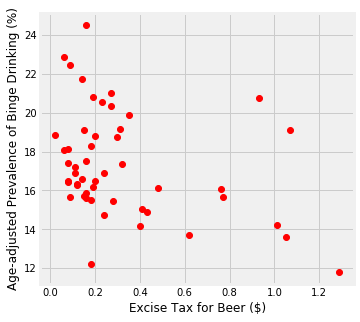

In [85]:
plt.plot(alc_tax_beer['DataValueAlt'], trim_alc_drink_aa['DataValueAlt'], 'ro')
plt.xlabel('Excise Tax for Beer ($)')
plt.ylabel('Age-adjusted Prevalence of Binge Drinking (%)')

Text(0, 0.5, 'Crude Prevalence of Binge Drinking (%)')

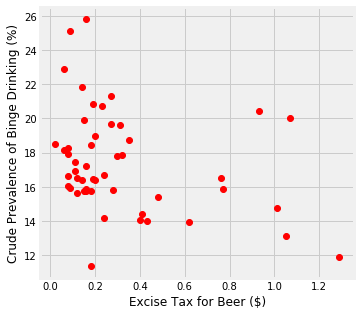

In [86]:
plt.plot(alc_tax_beer['DataValueAlt'], trim_alc_drink_crude['DataValueAlt'], 'ro')
plt.xlabel('Excise Tax for Beer ($)')
plt.ylabel('Crude Prevalence of Binge Drinking (%)')

In [59]:
# heatmap for alc_tax_beer, trim_alc_drink_crude, trim_alc_drink_aa
# null hypothesis is no difference between 
# laura make vector for each alcohol with vectorization